In [ ]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
ulasan_df = pd.read_excel('/content/ferizy dataset.xlsx')
ulasan_df.head()

,Unnamed: 0,userName,score,at,content
0,0,Dsatia channel,1,2023-08-24 08:50:48,buka aplikasi loading memuat data terus gak se...
1,1,Dimas Izha Ananta,1,2023-08-23 17:23:34,"lama bet tolol loadingnya,orang mo bayar juga"
2,2,itha firman,1,2023-08-23 13:28:54,"Aplikasi buluk,nyusahin"
3,3,MR Sutan Alamsyah,5,2023-08-23 13:14:52,Sangat bagus
4,4,Saya Ganteng,2,2023-08-23 08:00:25,Minimal kalo buat database itu pake jaringan t...


In [ ]:
df =ulasan_df [['userName','score','content']]

In [ ]:
import re

In [ ]:
def case_folding(data):
  temp_ulasan = []

  for mm in data:
    # removal of links[https://example.com]
    # mm = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "", mm)
    mm = re.sub(r"http\S+", "", mm)

    # removal of new line
    mm = re.sub('\n', '', mm)

    # removal of punctuations and numbers
    mm = re.sub("[^a-zA-Z^']", " ", mm)
    mm = re.sub(" {2,}", " ", mm)

      # remove whitespace with a single space
    mm = re.sub(r'\s+', ' ', mm)

    # convert text to Lowercase
    mm = mm.lower();
    temp_ulasan.append(mm)
  return temp_ulasan


In [ ]:
df['Case_Folding']=case_folding(df['content'])
df.head()

,userName,score,content,Case_Folding
0,Dsatia channel,1,buka aplikasi loading memuat data terus gak se...,buka aplikasi loading memuat data terus gak se...
1,Dimas Izha Ananta,1,"lama bet tolol loadingnya,orang mo bayar juga",lama bet tolol loadingnya orang mo bayar juga
2,itha firman,1,"Aplikasi buluk,nyusahin",aplikasi buluk nyusahin
3,MR Sutan Alamsyah,5,Sangat bagus,sangat bagus
4,Saya Ganteng,2,Minimal kalo buat database itu pake jaringan t...,minimal kalo buat database itu pake jaringan t...


In [ ]:
pip install nltk

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def tokenized(data):
  return data.apply(nltk.word_tokenize)

In [ ]:
df['Tokenizing']=tokenized(df['Case_Folding'])
df.head()

,userName,score,content,Case_Folding,Tokenizing
0,Dsatia channel,1,buka aplikasi loading memuat data terus gak se...,buka aplikasi loading memuat data terus gak se...,"[buka, aplikasi, loading, memuat, data, terus,..."
1,Dimas Izha Ananta,1,"lama bet tolol loadingnya,orang mo bayar juga",lama bet tolol loadingnya orang mo bayar juga,"[lama, bet, tolol, loadingnya, orang, mo, baya..."
2,itha firman,1,"Aplikasi buluk,nyusahin",aplikasi buluk nyusahin,"[aplikasi, buluk, nyusahin]"
3,MR Sutan Alamsyah,5,Sangat bagus,sangat bagus,"[sangat, bagus]"
4,Saya Ganteng,2,Minimal kalo buat database itu pake jaringan t...,minimal kalo buat database itu pake jaringan t...,"[minimal, kalo, buat, database, itu, pake, jar..."


In [ ]:
normalizad_word = pd.read_excel("normalisasi.xlsx")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

df['Normalisasi'] = df['Tokenizing'].apply(normalized_term)

df.loc[0:9,['Tokenizing', 'Normalisasi']]
df.head ()

,userName,score,content,Case_Folding,Tokenizing,Normalisasi
0,Dsatia channel,1,buka aplikasi loading memuat data terus gak se...,buka aplikasi loading memuat data terus gak se...,"[buka, aplikasi, loading, memuat, data, terus,...","[buka, aplikasi, loading, memuat, data, terus,..."
1,Dimas Izha Ananta,1,"lama bet tolol loadingnya,orang mo bayar juga",lama bet tolol loadingnya orang mo bayar juga,"[lama, bet, tolol, loadingnya, orang, mo, baya...","[lama, sangat, tolol, loading, orang, mau, bay..."
2,itha firman,1,"Aplikasi buluk,nyusahin",aplikasi buluk nyusahin,"[aplikasi, buluk, nyusahin]","[aplikasi, buruk, menyusahkan]"
3,MR Sutan Alamsyah,5,Sangat bagus,sangat bagus,"[sangat, bagus]","[sangat, bagus]"
4,Saya Ganteng,2,Minimal kalo buat database itu pake jaringan t...,minimal kalo buat database itu pake jaringan t...,"[minimal, kalo, buat, database, itu, pake, jar...","[minimal, kalau, membuat, database, itu, pakai..."


In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def removeStopWords(data):
  stop_words = set(stopwords.words('indonesian'))
  return data.apply(lambda x: [item for item in x if item not in stop_words])

In [ ]:
df['Stopwords']=removeStopWords(df['Normalisasi'])
df.head()

,userName,score,content,Case_Folding,Tokenizing,Normalisasi,Stopwords
0,Dsatia channel,1,buka aplikasi loading memuat data terus gak se...,buka aplikasi loading memuat data terus gak se...,"[buka, aplikasi, loading, memuat, data, terus,...","[buka, aplikasi, loading, memuat, data, terus,...","[buka, aplikasi, loading, memuat, data, selesa..."
1,Dimas Izha Ananta,1,"lama bet tolol loadingnya,orang mo bayar juga",lama bet tolol loadingnya orang mo bayar juga,"[lama, bet, tolol, loadingnya, orang, mo, baya...","[lama, sangat, tolol, loading, orang, mau, bay...","[tolol, loading, orang, bayar]"
2,itha firman,1,"Aplikasi buluk,nyusahin",aplikasi buluk nyusahin,"[aplikasi, buluk, nyusahin]","[aplikasi, buruk, menyusahkan]","[aplikasi, buruk, menyusahkan]"
3,MR Sutan Alamsyah,5,Sangat bagus,sangat bagus,"[sangat, bagus]","[sangat, bagus]",[bagus]
4,Saya Ganteng,2,Minimal kalo buat database itu pake jaringan t...,minimal kalo buat database itu pake jaringan t...,"[minimal, kalo, buat, database, itu, pake, jar...","[minimal, kalau, membuat, database, itu, pakai...","[minimal, database, pakai, jaringan, tersendir..."


In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.3 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize

In [ ]:
def stemming(data):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  return [stemmer.stem(tweet) for tweet in data]

In [ ]:
df['Stemming'] = df['Stopwords'].apply(stemming)
df.head ()

,userName,score,content,Case_Folding,Tokenizing,Normalisasi,Stopwords,Stemming
0,Dsatia channel,1,buka aplikasi loading memuat data terus gak se...,buka aplikasi loading memuat data terus gak se...,"[buka, aplikasi, loading, memuat, data, terus,...","[buka, aplikasi, loading, memuat, data, terus,...","[buka, aplikasi, loading, memuat, data, selesa...","[buka, aplikasi, loading, muat, data, selesai,..."
1,Dimas Izha Ananta,1,"lama bet tolol loadingnya,orang mo bayar juga",lama bet tolol loadingnya orang mo bayar juga,"[lama, bet, tolol, loadingnya, orang, mo, baya...","[lama, sangat, tolol, loading, orang, mau, bay...","[tolol, loading, orang, bayar]","[tolol, loading, orang, bayar]"
2,itha firman,1,"Aplikasi buluk,nyusahin",aplikasi buluk nyusahin,"[aplikasi, buluk, nyusahin]","[aplikasi, buruk, menyusahkan]","[aplikasi, buruk, menyusahkan]","[aplikasi, buruk, susah]"
3,MR Sutan Alamsyah,5,Sangat bagus,sangat bagus,"[sangat, bagus]","[sangat, bagus]",[bagus],[bagus]
4,Saya Ganteng,2,Minimal kalo buat database itu pake jaringan t...,minimal kalo buat database itu pake jaringan t...,"[minimal, kalo, buat, database, itu, pake, jar...","[minimal, kalau, membuat, database, itu, pakai...","[minimal, database, pakai, jaringan, tersendir...","[minimal, database, pakai, jaring, sendiri, ca..."


In [ ]:
df.to_excel('ferizy_preprocessing.xlsx', encoding='utf-8')


In [ ]:
sentimen_df = pd.read_excel('/content/sentimen ferizy.xlsx')
sentimen_df.head()

,Sentimen
0,-1
1,-1
2,-1
3,1
4,-1


In [ ]:
df1 =sentimen_df.copy()

In [ ]:
df3 = pd.merge (df, df1, left_index=True, right_index=True)
df3.head()

,userName,score,content,Case_Folding,Tokenizing,Normalisasi,Stopwords,Stemming,Sentimen
0,Dsatia channel,1,buka aplikasi loading memuat data terus gak se...,buka aplikasi loading memuat data terus gak se...,"[buka, aplikasi, loading, memuat, data, terus,...","[buka, aplikasi, loading, memuat, data, terus,...","[buka, aplikasi, loading, memuat, data, selesa...","[buka, aplikasi, loading, muat, data, selesai,...",-1
1,Dimas Izha Ananta,1,"lama bet tolol loadingnya,orang mo bayar juga",lama bet tolol loadingnya orang mo bayar juga,"[lama, bet, tolol, loadingnya, orang, mo, baya...","[lama, sangat, tolol, loading, orang, mau, bay...","[tolol, loading, orang, bayar]","[tolol, loading, orang, bayar]",-1
2,itha firman,1,"Aplikasi buluk,nyusahin",aplikasi buluk nyusahin,"[aplikasi, buluk, nyusahin]","[aplikasi, buruk, menyusahkan]","[aplikasi, buruk, menyusahkan]","[aplikasi, buruk, susah]",-1
3,MR Sutan Alamsyah,5,Sangat bagus,sangat bagus,"[sangat, bagus]","[sangat, bagus]",[bagus],[bagus],1
4,Saya Ganteng,2,Minimal kalo buat database itu pake jaringan t...,minimal kalo buat database itu pake jaringan t...,"[minimal, kalo, buat, database, itu, pake, jar...","[minimal, kalau, membuat, database, itu, pakai...","[minimal, database, pakai, jaringan, tersendir...","[minimal, database, pakai, jaring, sendiri, ca...",-1


In [ ]:
data1 = df3[['Stemming']]
data2 = df3[['Sentimen']]
dataset = pd.concat([data1, data2], axis=1)
dataset.head()

,Stemming,Sentimen
0,"[buka, aplikasi, loading, muat, data, selesai,...",-1
1,"[tolol, loading, orang, bayar]",-1
2,"[aplikasi, buruk, susah]",-1
3,[bagus],1
4,"[minimal, database, pakai, jaring, sendiri, ca...",-1


In [ ]:
df3['Ready'] = df3['Stemming'].apply(lambda x: ' '.join(x))
df3.head()

,userName,score,content,Case_Folding,Tokenizing,Normalisasi,Stopwords,Stemming,Sentimen,Ready
0,Dsatia channel,1,buka aplikasi loading memuat data terus gak se...,buka aplikasi loading memuat data terus gak se...,"[buka, aplikasi, loading, memuat, data, terus,...","[buka, aplikasi, loading, memuat, data, terus,...","[buka, aplikasi, loading, memuat, data, selesa...","[buka, aplikasi, loading, muat, data, selesai,...",-1,buka aplikasi loading muat data selesai perbaikin
1,Dimas Izha Ananta,1,"lama bet tolol loadingnya,orang mo bayar juga",lama bet tolol loadingnya orang mo bayar juga,"[lama, bet, tolol, loadingnya, orang, mo, baya...","[lama, sangat, tolol, loading, orang, mau, bay...","[tolol, loading, orang, bayar]","[tolol, loading, orang, bayar]",-1,tolol loading orang bayar
2,itha firman,1,"Aplikasi buluk,nyusahin",aplikasi buluk nyusahin,"[aplikasi, buluk, nyusahin]","[aplikasi, buruk, menyusahkan]","[aplikasi, buruk, menyusahkan]","[aplikasi, buruk, susah]",-1,aplikasi buruk susah
3,MR Sutan Alamsyah,5,Sangat bagus,sangat bagus,"[sangat, bagus]","[sangat, bagus]",[bagus],[bagus],1,bagus
4,Saya Ganteng,2,Minimal kalo buat database itu pake jaringan t...,minimal kalo buat database itu pake jaringan t...,"[minimal, kalo, buat, database, itu, pake, jar...","[minimal, kalau, membuat, database, itu, pakai...","[minimal, database, pakai, jaringan, tersendir...","[minimal, database, pakai, jaring, sendiri, ca...",-1,minimal database pakai jaring sendiri campur k...


In [ ]:
data1 = df3[['Ready']]
data2 = df3[['Sentimen']]
dataset = pd.concat([data1, data2], axis=1)
dataset.head()

,Ready,Sentimen
0,buka aplikasi loading muat data selesai perbaikin,-1
1,tolol loading orang bayar,-1
2,aplikasi buruk susah,-1
3,bagus,1
4,minimal database pakai jaring sendiri campur k...,-1


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X = dataset['Ready']
label = dataset['Sentimen']

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vector = tfidf_vectorizer.fit_transform(X)
tfidf_vector.shape

(1500, 1850)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sampler = SMOTE()
tfidf_vector, label = sampler.fit_resample(tfidf_vector, label)
print(tfidf_vector.shape)
print(label.shape)

(1830, 1850)
(1830,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_vector, label, test_size=0.1, shuffle=True, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1647, 1850)
(183, 1850)
(1647,)
(183,)


In [ ]:
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

# Sort TFIDF by value
max_tf_idfs = X_train.max(0).toarray()[0] # Get largest tfidf values across all documents.
sorted_tf_idxs = max_tf_idfs.argsort() # Sorted indices
sorted_tf_idfs = max_tf_idfs[sorted_tf_idxs] # Sorted TFIDF values

# feature_names doesn't need to be sorted! You just access it with a list of sorted indices!
smallest_tf_idfs = pd.Series(sorted_tf_idfs[:10], index=feature_names[sorted_tf_idxs[:10]])
largest_tf_idfs = pd.Series(sorted_tf_idfs[-10:][::-1], index=feature_names[sorted_tf_idxs[-10:][::-1]])

In [ ]:
print('Most common words:\n', smallest_tf_idfs)
print('\n')
print('Most important words:\n', largest_tf_idfs)

Most common words:
 zz            0.0
rebet         0.0
kamar         0.0
request       0.0
revisi        0.0
riau          0.0
aplnya        0.0
cenderung     0.0
momen         0.0
gabisabisa    0.0
dtype: float64


Most important words:
 nyaman    1.0
josss     1.0
ramah     1.0
hadiah    1.0
bug       1.0
mantap    1.0
hangus    1.0
stars     1.0
valid     1.0
oke       1.0
dtype: float64


In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

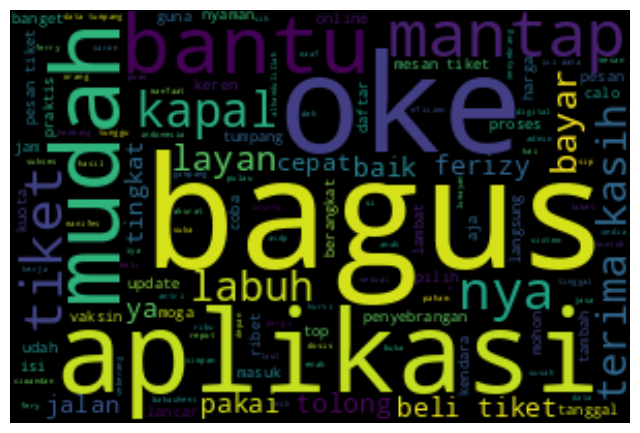

In [ ]:
vpos_words = ' '.join([word for word in dataset['Ready'][dataset['Sentimen']==1]])
wordcloud = WordCloud(width=300, height=200, max_font_size=75).generate(vpos_words)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

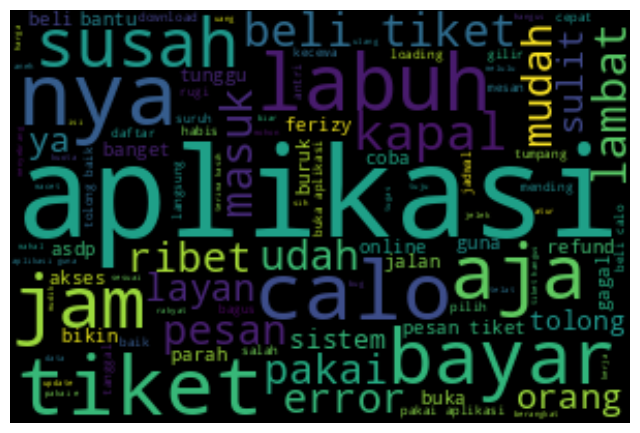

In [ ]:
vneg_words = ' '.join([word for word in dataset['Ready'][dataset['Sentimen']==-1]])
wordcloud = WordCloud(width=300, height=200, max_font_size=75).generate(vneg_words)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics


In [ ]:
def print_conf(y_test, result, classes, title='Confusion matrix'):
  conf_matrix = metrics.confusion_matrix(y_test, result)
  plt.figure(figsize=(5,5))
  sns.heatmap(conf_matrix,
              annot=True,
              xticklabels=classes,
              yticklabels=classes,
              cmap="Blues",
              fmt='d')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.title(title)
  plt.show()

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train) #training svc model
y_pred_svc = svc.predict(X_test) # predicting test data

In [ ]:
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

0.9848208864602307
0.912568306010929


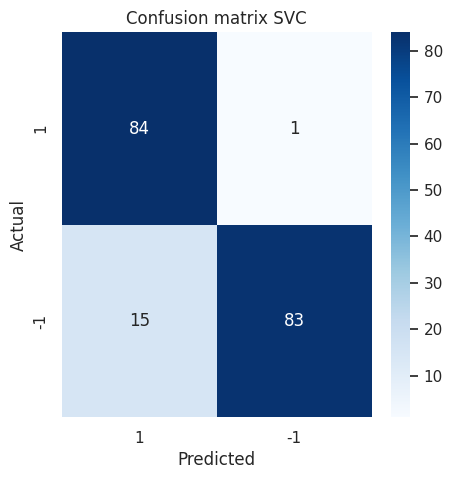

In [ ]:
print_conf(y_test, y_pred_svc, [1, -1], title="Confusion matrix SVC")

In [ ]:
print(metrics.classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

          -1       0.85      0.99      0.91        85
           1       0.99      0.85      0.91        98

    accuracy                           0.91       183
   macro avg       0.92      0.92      0.91       183
weighted avg       0.92      0.91      0.91       183



In [ ]:
models = ['SVM']
accSVMC = metrics.accuracy_score(y_test,y_pred_svc)

accuracies = [accSVMC]
comp = pd.DataFrame(list(zip(models, accuracies)), columns=['Model', 'Accuracy'])
comp

,Model,Accuracy
0,SVM,0.912568


In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
#clf.fit(X_train_tfidf,y_train)

In [ ]:
clf.fit(X_train,y_train)
y_pred_clf = clf.predict(X_test) # predicting test data

In [ ]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.896782027929569
0.819672131147541


In [ ]:
# Accuracy Comparison
models = ['SVM', 'Naive Bayes']
accSVMC = metrics.accuracy_score(y_test,y_pred_svc)
accNB = metrics.accuracy_score(y_test,y_pred_clf)
accuracies = [accSVMC, accNB]
comp = pd.DataFrame(list(zip(models, accuracies)), columns=['Model', 'Accuracy'])
comp

,Model,Accuracy
0,SVM,0.912568
1,Naive Bayes,0.819672


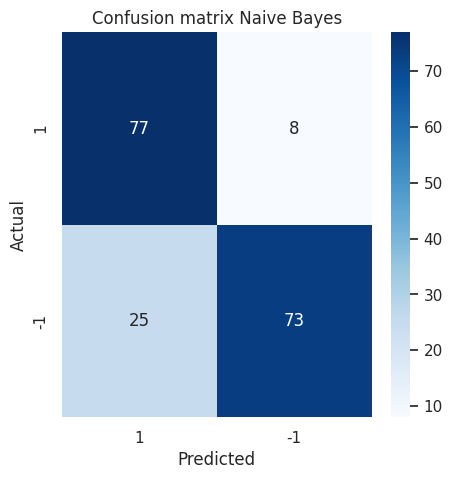

In [ ]:
print_conf(y_test, y_pred_clf, [1, -1], title="Confusion matrix Naive Bayes")

In [ ]:
print(metrics.classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

          -1       0.75      0.91      0.82        85
           1       0.90      0.74      0.82        98

    accuracy                           0.82       183
   macro avg       0.83      0.83      0.82       183
weighted avg       0.83      0.82      0.82       183



In [ ]:
import joblib

# Saving model
joblib.dump(clf, 'Sentimen Ferizy Classifier.joblib')
joblib.dump(tfidf_vectorizer, 'Sentimen Ferizy TF-IDF Vectorizer.joblib')

['Sentimen Ferizy TF-IDF Vectorizer.joblib']

In [ ]:
df['prediction'] = svc.predict(tfidf_vectorizer.transform(df['content']))


# Save new dataframe into excel file
df.to_excel('Sentimen Ferizy Classification.xlsx', index=False)

df.head()

,userName,score,content,Case_Folding,Tokenizing,Normalisasi,Stopwords,Stemming,prediction
0,Dsatia channel,1,buka aplikasi loading memuat data terus gak se...,buka aplikasi loading memuat data terus gak se...,"[buka, aplikasi, loading, memuat, data, terus,...","[buka, aplikasi, loading, memuat, data, terus,...","[buka, aplikasi, loading, memuat, data, selesa...","[buka, aplikasi, loading, muat, data, selesai,...",-1
1,Dimas Izha Ananta,1,"lama bet tolol loadingnya,orang mo bayar juga",lama bet tolol loadingnya orang mo bayar juga,"[lama, bet, tolol, loadingnya, orang, mo, baya...","[lama, sangat, tolol, loading, orang, mau, bay...","[tolol, loading, orang, bayar]","[tolol, loading, orang, bayar]",-1
2,itha firman,1,"Aplikasi buluk,nyusahin",aplikasi buluk nyusahin,"[aplikasi, buluk, nyusahin]","[aplikasi, buruk, menyusahkan]","[aplikasi, buruk, menyusahkan]","[aplikasi, buruk, susah]",-1
3,MR Sutan Alamsyah,5,Sangat bagus,sangat bagus,"[sangat, bagus]","[sangat, bagus]",[bagus],[bagus],1
4,Saya Ganteng,2,Minimal kalo buat database itu pake jaringan t...,minimal kalo buat database itu pake jaringan t...,"[minimal, kalo, buat, database, itu, pake, jar...","[minimal, kalau, membuat, database, itu, pakai...","[minimal, database, pakai, jaringan, tersendir...","[minimal, database, pakai, jaring, sendiri, ca...",-1


In [ ]:
input_ulasan = ['bagus sekali ',
               'aplikasi buruk bikin emosi',
                'aplikasi berjalan lancar']

def preProcessText(ferizy):
    new_ulasan = []
    for tw in texts:
        tw = case_folding(tw)
        tw = tokenized(tw)
        tw = stemming(tw)
        tw = removeStopWords(tw)
        tw = ' '.join(tw)
        new_ulasan.append(tw)

    return new_ulasan

def predictNewData(ferizy):
    saved_model = joblib.load('Sentimen Ferizy Classifier.joblib')
    saved_tfidf = joblib.load('Sentimen Ferizy TF-IDF Vectorizer.joblib')

    vectorized_ferizy = saved_tfidf.transform(ferizy)
    input_prediction = saved_model.predict(vectorized_ferizy)

    for i in range(len(input_ulasan)):
        if input_prediction[i]==1:
            print('Input text:\n',
                input_ulasan[i],
                '\nPrediction: \nPositif\n')
        else:
            print('Input text:\n',
                input_ulasan[i],
                "\nPrediction: \nNegatif\n")
predictNewData(input_ulasan)

Input text:
 bagus sekali  
Prediction: 
Positif

Input text:
 aplikasi buruk bikin emosi 
Prediction: 
Negatif

Input text:
 aplikasi berjalan lancar 
Prediction: 
Positif

